# Radical Semibatch Copolymerization

## Introduction

Copolymerization, in general—and radical copolymerization, in particular—is a widely used method to combine the properties of two or more monomers into a single material. In copolymerizations involving $N$ monomers, the total number of reactions scales as $N^2$. For example, extending the base reaction scheme presented in [Notebook 5] to two monomers would yield the following:

\begin{align*}
I                                 & \xrightarrow{k_d}           2 I^{\cdot} \\

I^{\cdot} + M_1                   & \xrightarrow{\textrm{fast}} R_{1,1}^{\cdot} \\

I^{\cdot} + M_2                   & \xrightarrow{\textrm{fast}} R_{2,1}^{\cdot} \\

R_{1,n}^{\cdot} + M_1             & \xrightarrow{k_{p,11}}      R_{1,n+1}^{\cdot} \\

R_{1,n}^{\cdot} + M_2             & \xrightarrow{k_{p,12}}      R_{2,n+1}^{\cdot} \\

R_{2,n}^{\cdot} + M_1             & \xrightarrow{k_{p,21}}      R_{1,n+1}^{\cdot} \\

R_{2,n}^{\cdot} + M_2             & \xrightarrow{k_{p,22}}      R_{2,n+1}^{\cdot} \\

R_{1,n}^{\cdot} + R_{1,m}^{\cdot} & \xrightarrow{k_{tc,11}}     P_{n+m} \\

R_{1,n}^{\cdot} + R_{2,m}^{\cdot} & \xrightarrow{k_{tc,12}}     P_{n+m} \\

R_{2,n}^{\cdot} + R_{2,m}^{\cdot} & \xrightarrow{k_{tc,22}}     P_{n+m} \\

R_{1,n}^{\cdot} + R_{1,m}^{\cdot} & \xrightarrow{k_{td,11}}     P_n + P_m \\

R_{1,n}^{\cdot} + R_{2,m}^{\cdot} & \xrightarrow{k_{td,12}}     P_n + P_m \\

R_{2,n}^{\cdot} + R_{2,m}^{\cdot} & \xrightarrow{k_{td,22}}     P_n + P_m 
\end{align*}

Considering all these reactions and radical distributions in an explicit manner can quickly become overwhelming. 🤯 To reduce this complexity, we can use the [pseudo-homopolymerization approach] (also known as pseudo-kinetic rate constant method). This allows us to recast the copolymerization model in a form very similar to that presented for semibatch homopolymerization in [Notebook 8], with only one additional state variable per monomer. Here is how it works for a binary system. The first "trick" is to _lump_ the individual radical distributions into an overall radical distribution:

\begin{equation}
[R_{n}^{\cdot}] = [R_{1,n}^{\cdot}] + [R_{2,n}^{\cdot}]
\end{equation}

and define the corresponding radical fractions:

\begin{align}
p_1 &= \frac{\sum_{n=1}^{\infty} [R_{1,n}^{\cdot}]}{\sum_{n=1}^{\infty} [R_{n}^{\cdot}]} \\
p_2 &= 1 - p_1
\end{align}

The second "trick" is estimate the radical fractions from the quasi-steady-state radical balances. In our case, we obtain:

\begin{equation}
p_1 = \frac{k_{p,21}f_1}{k_{p,21}f_1 + k_{p,12}f_2}
\end{equation}

with $f_i$ being the mole fraction of monomer $i$:

\begin{align}
f_1 &= \frac{[M_1]}{[M]} \\
f_2 &= 1 - f_1
\end{align}

As a result, the state vector needs only to include four species ($I$, $M_1$, $M_2$, $S$) and six moments ($\mu_0$, $\mu_1$, $\mu_2$, $\lambda_0$, $\lambda_1$, and $\lambda_2$). The corresponding rates of formation are: 

\begin{align}
r_{I} & = - k_d [I] \\
r_{M_1} & = - (p_1 k_{p,11} + p_2 k_{p,21} ) [M_1] \mu_0 - 2 f k_d [I] f_1 \\
r_{M_2} & = - (p_1 k_{p,12} + p_2 k_{p,22} ) [M_2] \mu_0 - 2 f k_d [I] f_2 \\
r_{S} & = 0 \\
r_{\mu_0} & = 2 f k_d [I] - 2 \bar{k}_t \mu_0^2 \\
r_{\mu_1} & = 2 f k_d [I] + \bar{k}_p [M] \mu_0 - 2 \bar{k}_t \mu_0 \mu_1 \\
r_{\mu_2} & = 2 f k_d [I] + \bar{k}_p [M] (\mu_0 + 2 \mu_1) - 2 \bar{k}_t \mu_0 \mu_2 \\
r_{\lambda_0} & = (\bar{k}_{tc} + 2 \bar{k}_{td}) \mu_0^2 \\
r_{\lambda_1} & = 2 \bar{k}_{t} \mu_0 \mu_1 \\
r_{\lambda_2} & = 2 \bar{k}_{t} \mu_0 \mu_2 + 2 \bar{k}_{tc} \mu_1^2
\end{align}

The average rate coefficients (also known as pseudo-kinetic rate coefficients) can be expressed in terms of the system composition at any given instant. The average propagation rate coefficient is simply given by:

\begin{equation}
\bar{k}_p = k_{p,11} p_1 f_1  + k_{p,12} p_1 f_2 + k_{p,21} p_2 f_1 + k_{p,22} p_2 f_2
\end{equation}

For termination, different approaches exist depending on whether the termination rate is assumed to be governed by the nature of the last unit or by the overall composition of the chain. If we suppose the latter, the average termination rate coefficient can be estimated as:

\begin{equation}
\bar{k}_t = F_1 k_{t,11} + F_2 k_{t,22}
\end{equation}

where $F_i$ denotes the instantaneous polymer composition. In contrast, the split between combination and disproportionation is more likely to depend on the nature of the terminal unit. Therefore, we might estimate the average disproportionation ratio as follows:

\begin{equation}
\bar{\alpha} = \frac{\bar{k}_{td}}{\bar{k}_{t}} = \alpha_{11} p_1^2 + 2 \sqrt{\alpha_{11} \alpha_{22}} p_1 p_2 + \alpha_{22} p_2^2
\end{equation}

where $\alpha_{ii} = k_{td,ii}/k_{t,ii}$. These are just illustrative examples, as no consensus exists on the optimal approach.

The instantaneous copolymer composition can be estimated from the [Mayo-Lewis] equation:

\begin{equation}
F_1=\frac{r_1 f_1^2 + f_1 f_2}{r_1 f_1^2 + 2 f_1 f_2 + r_2 f_2^2}
\end{equation}

where $r_1 = k_{p,11} / k_{p,12}$ and $r_2 = k_{p,22} / k_{p,21}$. 

```{note}
It can be quite tempting to think that $p_i$ and $F_i$ ought to be the same thing, but they are not. Can you explain why? 
```

To complete the model, we introduce two _counter_ variables, $B_1$ and $B_2$, to track the number of moles of each monomer that have reacted. These variables allow us to calculate the average molar mass of the repeating units (if the two monomers have different molar masses) and determine the cumulative copolymer composition. The corresponding rates of formation are directly related to the rates of monomer consumption:

\begin{align}
r_{B_1} & = - r_{M_1} \\
r_{B_2} & = - r_{M_2}
\end{align}

[Notebook 5]: ./05_radical_pbe_batch_polymerization.ipynb
[Notebook 8]: ./08_radical_semibatch_polymerization.ipynb
[Mayo-Lewis]: https://en.wikipedia.org/wiki/Mayo%E2%80%93Lewis_equation
[pseudo-homopolymerization approach]: https://doi.org/10.1016/0032-3861(91)90345-J

## Numerical Solution

In [1]:
from enum import IntEnum

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

### Model Equations

The structure of this model is intentionally similar to that used in [Notebook 8]. However, we will remove the parts related to heat balance and temperature control, in order to keep the focus on copolymerization.

In [2]:
def arrhenius(T: float, k0: float, Ea: float, T0: float) -> float:
    """Arrhenius equation.

    Parameters
    ----------
    T : float
        Temperature (°C).
    k0 : float
        Value of rate coefficient at `T0` (#/s).
    Ea : float
        Energy of activation (J/mol).
    T0 : float
        Reference temperature (°C).

    Returns
    -------
    float
        Value of rate coefficient at `T`.
    """
    R = 8.314  # J/(mol·K)
    return k0 * np.exp(-Ea / R * (1/(273.15 + T) - 1/(273.15 + T0)))

To improve code readability, we define an enum mapping the variable names to the corresponding row index in the state vector and related arrays.

In [3]:
class Ix(IntEnum):
    I    = 0
    M1   = 1
    M2   = 2
    S    = 3
    mu0  = 4
    mu1  = 5
    mu2  = 6
    lbd0 = 7
    lbd1 = 8
    lbd2 = 9
    B1   = 10
    B2   = 11

We can now implement a function to calculate the reaction rates for all species, counters and moments.

In [4]:
def model_rates(C: np.ndarray, T: float, params: dict) -> tuple:
    """Reaction rates and related variables.

    Parameters
    ----------
    C : np.ndarray
        Concentration vector (mol/L).
    T : float
        Temperature (°C).
    params : dict
        Model parameters.

    Returns
    -------
    tuple
        Reaction rate vector (mol/(L·s)), f_i, p_i and F_i.
    """

    # Rate coefficients
    kinetics = params['kinetics']
    kd = arrhenius(T, **kinetics['kd'])
    f = kinetics['f']
    kp11 = arrhenius(T, **kinetics['kp11'])
    kp22 = arrhenius(T, **kinetics['kp22'])
    r1 = kinetics['r1']
    r2 = kinetics['r2']
    kt11 = arrhenius(T, **kinetics['kt11'])
    kt22 = arrhenius(T, **kinetics['kt22'])
    alpha11 = kinetics['alpha11']
    alpha22 = kinetics['alpha22']
    kp12 = kp11/r1
    kp21 = kp22/r2

    # Unpack concentrations
    I  = C[Ix.I]
    M1 = C[Ix.M1]
    M2 = C[Ix.M2]
    mu = C[Ix.mu0:Ix.mu2+1]
    
    # Monomer mole fractions
    M = M1 + M2
    f1 = M1/(M + 1e-10)
    f2 = M2/(M + 1e-10)
    
    # Instantaneous copolymer composition
    F1 = r1*f1**2 + f1*f2
    F2 = r2*f2**2 + f1*f2
    Fsum = F1 + F2 + 1e-10
    F1 /= Fsum
    F2 /= Fsum

    # Radical fractions
    p1 = kp21*f1/(kp21*f1 + kp12*f2 + 1e-10)
    p2 = 1 - p1
    
    # Average kp
    kp = kp11*p1*f1 + kp12*p1*f2 + kp21*p2*f1 + kp22*p2*f2

    # Average kt
    kt = kt11*F1 + kt22*F2
    alpha = alpha11*p1**2 + 2*np.sqrt(alpha11*alpha22)*p1*p2 + alpha22*p2**2
    ktd = kt*alpha
    ktc = kt*(1 - alpha)

    # Reaction rates
    r = np.empty_like(C)
    ri = 2*f*kd*I
    r[Ix.I]    = -kd*I
    r[Ix.M1]   = -(ri*f1 + (kp11*p1 + kp21*p2)*M1*mu[0])
    r[Ix.M2]   = -(ri*f2 + (kp12*p1 + kp22*p2)*M2*mu[0])
    r[Ix.S]    = 0.
    r[Ix.mu0]  = ri - 2*kt*mu[0]**2
    r[Ix.mu1]  = ri + kp*M*mu[0] - 2*kt*mu[0]*mu[1]
    r[Ix.mu2]  = ri + kp*M*(mu[0] + 2*mu[1]) - 2*kt*mu[0]*mu[2]
    r[Ix.lbd0] = (ktc + 2*ktd)*mu[0]**2
    r[Ix.lbd1] = 2*kt*mu[0]*mu[1]
    r[Ix.lbd2] = 2*kt*mu[0]*mu[2] + 2*ktc*mu[1]**2
    r[Ix.B1]   = - r[Ix.M1]
    r[Ix.B2]   = - r[Ix.M2]    

    return r, f1, f2, p1, p2, F1, F2

Next, we implement a function to evaluate all _auxiliary_ variables that we wish to track over time but that are not state variables. This function will be called both _during_ and _after_ the integration.

In [5]:
def model_aux(t: float, n: np.ndarray, params: dict) -> dict:
    """Auxiliary model function.

    Parameters
    ----------
    t : float
        Time (s).
    n : np.ndarray
        Components moles vector (mol).
    params : dict
        Model parameters.

    Returns
    -------
    dict
        Auxiliary variables.
    """

    # Unpack the moles vector (mol)
    n_I  = n[Ix.I]
    n_M1 = n[Ix.M1]
    n_M2 = n[Ix.M2]
    n_S  = n[Ix.S]
    n_B1 = n[Ix.B1]
    n_B2 = n[Ix.B2]

    # Temperature
    T = params['T'](t)

    # Total mass of the reaction mixture (kg)
    MW = params['MW']
    m_t = n_I*MW['I'] + (n_M1 + n_B1)*MW['M1'] + (n_M2 + n_B2)*MW['M2'] \
          + n_S*MW['S']

    # Total volume of the reaction mixture (L)
    rho = params['rho']
    V = n_M1*(MW['M1']/rho['M1']) + n_M2*(MW['M2']/rho['M2']) \
        + n_B1*(MW['M1']/rho['P1']) + n_B2*(MW['M2']/rho['P2']) \
        + n_S*(MW['S']/rho['S'])

    # Molar concentrations (mol/L)
    C = n/(V + 1e-10)

    # Reaction rates (L/(mol.s)) and related variables
    r, f1, f2, p1, p2, F1, F2 = model_rates(C, T, params)

    # Component molar feed rates (mol/s)
    feed = params['feed']
    ndot_in = np.zeros_like(n)
    ndot_in[Ix.I]  = feed['I'](t)
    ndot_in[Ix.M1] = feed['M1'](t)
    ndot_in[Ix.M2] = feed['M2'](t)
    ndot_in[Ix.S]  = feed['S'](t)

    # Pack variables in dict
    y = {
        'm_t': m_t,
        'V': V,
        'C': C,
        'r': r,
        'f1': f1,
        'f2': f2,
        'p1': p1,
        'p2': p2,
        'F1': F1,
        'F2': F2, 
        'ndot_in': ndot_in,
        'T': T
    }

    return y

All parts are now in place to implement the derivative of the state vector. This function is relatively straightforward, as most of the heavy lifting is handled by the previously defined functions.

In [6]:
def model_xdot(t: float, x: np.ndarray, params: dict) -> np.ndarray:
    """Calculate the derivative of the state vector, dx/dt.

    x = [n(I), n(M1), n(M2), n(S), n(mu_0)..n(mu_2), n(lambda_0)..n(lambda_2)]

    Parameters
    ----------
    t : float
        Time (s).
    x : np.ndarray
        State vector.
    params : dict
        Model parameters.

    Returns
    -------
    np.ndarray
        Time derivative of the state vector.
    """
    # Unpack the state vector
    n = x

    # Allocate the state vector derivative and respective views
    xdot = np.zeros_like(x)
    ndot = xdot[:]

    # Evaluate the auxiliary variables
    y = model_aux(t, n, params)

    # Material balances
    ndot_in = y['ndot_in']
    r = y['r']
    V = y['V']
    ndot[:] = ndot_in + r*V

    return xdot

Finally, we perform the numerical integration using a suitable ODE solver. This system is _very_ [stiff](https://en.wikipedia.org/wiki/Stiff_equation), therefore we need to choose an implicit solver like `LSODA`.

In [7]:
def solve_model(n0: np.ndarray,
                params: dict,
                tend: float,
                ) -> tuple[np.ndarray, ...]:
    """Solve the dynamic model.

    Parameters
    ----------
    n0 : float
        Initial component moles (mol).
    params : dict
        Model parameters.
    tend : float
        End simulation time.

    Returns
    -------
    tuple[np.ndarray, ...]
        t, n, T, m_t, V, ndot_in, C, f1, f2, F1, F2.
    """

    # Initial conditions
    x0 = n0

    solution = solve_ivp(model_xdot,
                         t_span=(0.0, tend),
                         y0=x0,
                         args=(params,),
                         method='LSODA',
                         rtol=1e-4,
                         atol=1e-11,
                         max_step=600.)

    # Unpack the solution
    t = solution.t
    x = solution.y
    n = x

    # Compute aux variables
    m_t     = np.empty_like(t)
    V       = np.empty_like(t)
    C       = np.empty_like(n)
    f1      = np.empty_like(t)
    f2      = np.empty_like(t)
    F1      = np.empty_like(t)
    F2      = np.empty_like(t)
    ndot_in = np.empty_like(n)
    T       = np.empty_like(t)

    for i in range(t.size):
        y = model_aux(t[i], n[:, i], params)
        m_t[i]        = y['m_t']
        V[i]          = y['V']
        C[:, i]       = y['C']
        ndot_in[:, i] = y['ndot_in']
        T[i]          = y['T']
        f1[i]         = y['f1']
        f2[i]         = y['f2']
        F1[i]         = y['F1']
        F2[i]         = y['F2']
        
    return t, n, T, m_t, V, ndot_in, C, f1, f2, F1, F2 

### Input Parameters

We will use some educated guesses for an imaginary solution copolymerization. Feel free to change them. 

In [8]:
params = {
    'MW': {
        'I':  0.150,  # kg/mol
        'M1': 0.100,  # kg/mol
        'M2': 0.140,  # kg/mol
        'S':  0.100,  # kg/mol
    },
    'rho': {
        'M1': 0.90,   # kg/L
        'M2': 0.95,   # kg/L
        'S':  0.80,   # kg/L
        'P1': 1.10,   # kg/L
        'P2': 1.15,   # kg/L
    },
    'kinetics': {
        'f': 0.5,
        'alpha11': 0.2,
        'alpha22': 0.8,
        'r1': 0.5,
        'r2': 2.0, 
        'kd': {
            'k0': 5e-4, # 1/s
            'Ea': 50e3, # J/mol
            'T0': 80.   # °C
        },
        'kp11': {
            'k0': 2e3,  # L/(mol·s)
            'Ea': 20e3, # J/mol
            'T0': 80.   # °C
        },
        'kp22': {
            'k0': 1e3,  # L/(mol·s)
            'Ea': 15e3, # J/mol
            'T0': 80.   # °C
        },
        'kt11': {
            'k0': 5e7,  # L/(mol·s)
            'Ea': 10e3, # J/mol
            'T0': 80.   # °C
        },
        'kt22': {
            'k0': 3e7,  # L/(mol·s)
            'Ea': 12e3, # J/mol
            'T0': 80.   # °C
        },
    },
    'T': lambda t: np.interp(t, [0., 1800., 11*3600.], [20., 80., 80.]),
    'feed': {
        'I':  lambda t: 2e-2 if (t > 1800. and t < 8*3600.) else 0.,  # mol/s
        'M1': lambda t: 1.2 if (t > 1800. and t < 6*3600.) else 0.,   # mol/s
        'M2': lambda t: 0.8 if (t > 1800. and t < 6*3600.) else 0.,   # mol/s
        'S':  lambda t: 3e0 if (t > 1800. and t < 6*3600.) else 0.,   # mol/s
    },
}

# Initial reactor content
n0 = np.zeros(len(Ix))
n0[Ix.I]  = 0.0
n0[Ix.M1] = 0.0
n0[Ix.M2] = 0.0
n0[Ix.S]  = 1e4

# Simulation time
tend = 10*3.6e3

### Run Simulation

Finally, we perform the integration; this should not take more than a fraction of a second, since there is only a dozen states.

In [9]:
t, n, T, m_t, V, ndot_in, C, f1, f2, F1, F2 = solve_model(n0, params, tend)

### Plots

#### Reactor Contents

Text(0.5, 58.7222222222222, 'Time (h)')

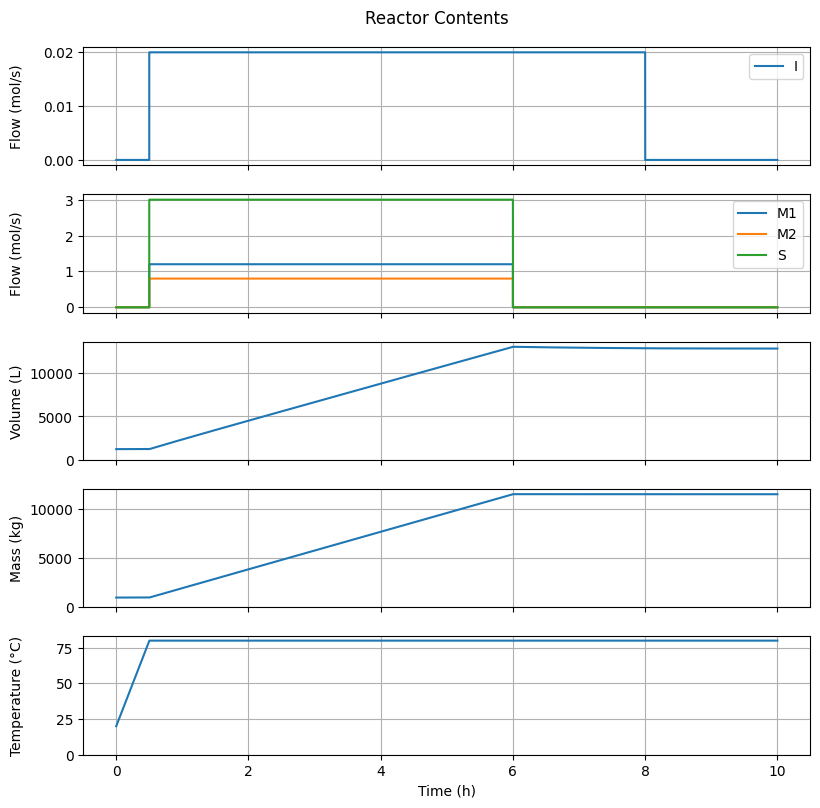

In [10]:
fig1, ax = plt.subplots(5, 1, sharex=True, figsize=(8, 8))
fig1.suptitle("Reactor Contents")
fig1.tight_layout()
fig1.align_ylabels()

t_hour = t/3.6e3

# Feed I
ax[0].plot(t_hour, ndot_in[Ix.I, :], label="I")
ax[0].set_ylabel("Flow (mol/s)")
ax[0].grid(True)
ax[0].legend(loc='upper right')

# Feed others
for species in ["M1", "M2", "S"]:
    ax[1].plot(t_hour, ndot_in[getattr(Ix, species), :], label=species)
ax[1].set_ylabel("Flow (mol/s)")
ax[1].grid(True)
ax[1].legend(loc='upper right')

# Volume
ax[2].plot(t_hour, V)
ax[2].set_ylabel("Volume (L)")
ax[2].set_ylim(0., None)
ax[2].grid(True)

# Mass
ax[3].plot(t_hour, m_t)
ax[3].set_ylabel("Mass (kg)")
ax[3].set_ylim(0., None)
ax[3].grid(True)

# Temperature
ax[4].plot(t_hour, T)
ax[4].set_ylabel("Temperature (°C)")
ax[4].set_ylim(0., None)
ax[4].grid(True)

ax[-1].set_xlabel("Time (h)")

#### Species Amounts & Concentrations

Text(0.5, 36.72222222222221, 'Time (h)')

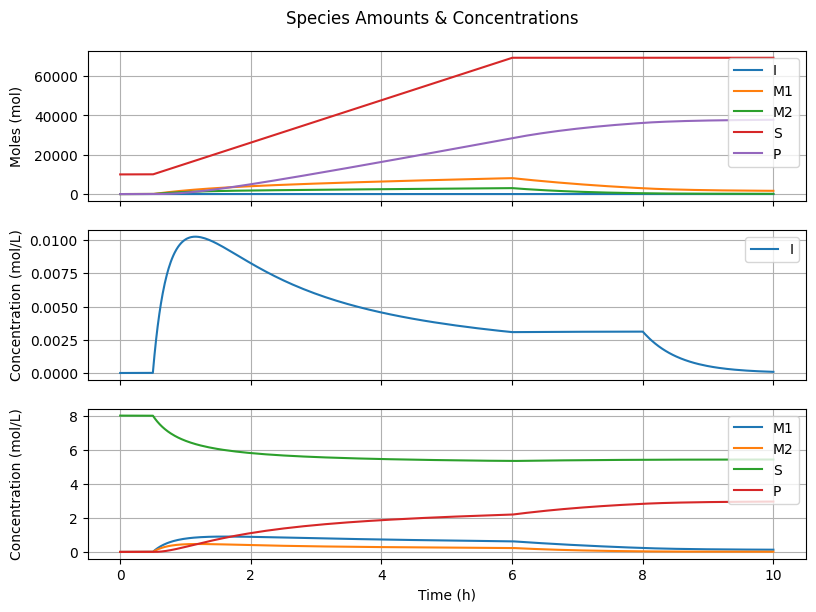

In [11]:
fig2, ax = plt.subplots(3, 1, sharex=True, figsize=(8, 6))
fig2.suptitle("Species Amounts & Concentrations")
fig2.tight_layout()
fig2.align_ylabels()

# Number of moles
for species in ["I", "M1", "M2", "S"]:
    ax[0].plot(t_hour, n[getattr(Ix, species), :], label=species)
ax[0].plot(t_hour, n[Ix.mu1, :] + n[Ix.lbd1, :], label="P")
ax[0].set_ylabel("Moles (mol)")
ax[0].grid(True)
ax[0].legend(loc='upper right')

# Molar concentration I
ax[1].plot(t_hour, C[Ix.I, :], label="I")
ax[1].set_ylabel("Concentration (mol/L)")
ax[1].grid(True)
ax[1].legend(loc='upper right')

# Molar concentrations others
for species in ["M1", "M2", "S"]:
    ax[2].plot(t_hour, C[getattr(Ix, species), :], label=species)
ax[2].plot(t_hour, C[Ix.mu1, :] + C[Ix.lbd1, :], label="P")
ax[2].set_ylabel("Concentration (mol/L)")
ax[2].grid(True)
ax[2].legend(loc='upper right')

ax[-1].set_xlabel("Time (h)")

#### Copolymer Composition

Text(0.5, 36.72222222222221, 'Time (h)')

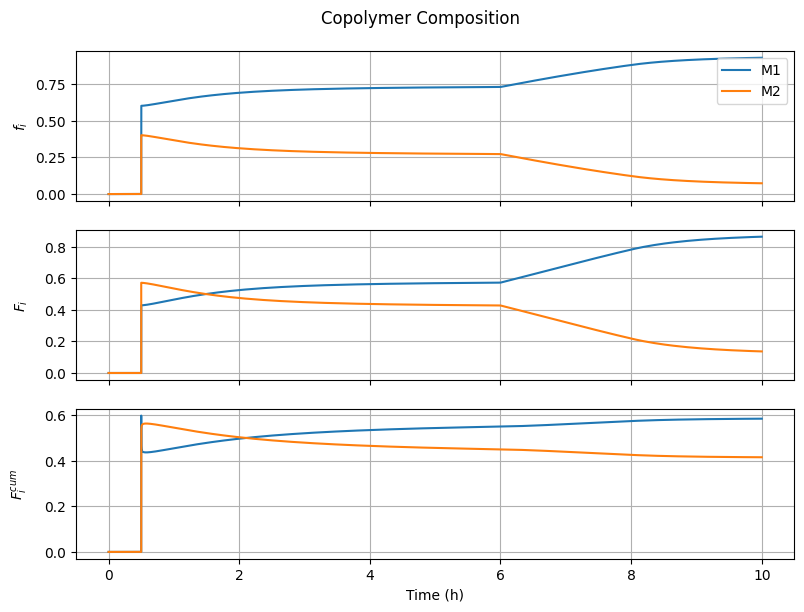

In [12]:
fig3, ax = plt.subplots(3, 1, sharex=True, figsize=(8, 6))
fig3.suptitle("Copolymer Composition")
fig3.tight_layout()
fig3.align_ylabels()

# Monomer composition
ax[0].plot(t_hour, f1, label="M1")
ax[0].plot(t_hour, f2, label="M2")
ax[0].set_ylabel(r"$f_i$")
ax[0].grid(True)
ax[0].legend(loc='upper right')

# Instantaneous copolymer composition
ax[1].plot(t_hour, F1, label="M1")
ax[1].plot(t_hour, F2, label="M2")
ax[1].set_ylabel(r"$F_i$")
ax[1].grid(True)

# Cumulative copolymer composition
F1cum = n[Ix.B1, :]/(n[Ix.B1, :] + n[Ix.B2, :] + 1e-10)
F2cum = n[Ix.B2, :]/(n[Ix.B1, :] + n[Ix.B2, :] + 1e-10)
ax[2].plot(t_hour, F1cum, label="M1")
ax[2].plot(t_hour, F2cum, label="M2")
ax[2].set_ylabel(r"$F_i^{cum}$")
ax[2].grid(True)

ax[-1].set_xlabel("Time (h)")

#### Polymer Chain Length and Dispersity

Text(0.5, 36.72222222222221, 'Time (h)')

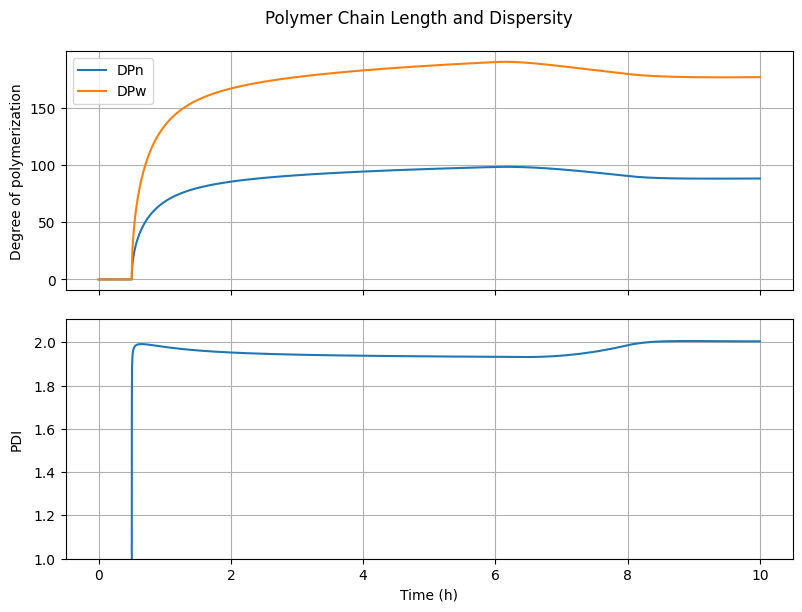

In [13]:
fig4, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
fig4.suptitle("Polymer Chain Length and Dispersity")
fig4.tight_layout()
fig4.align_ylabels()

# DPn and DPw
DPn = (n[Ix.mu1, :] + n[Ix.lbd1, :])/(n[Ix.mu0, :] + n[Ix.lbd0, :] + 1e-10)
DPw = (n[Ix.mu2, :] + n[Ix.lbd2, :])/(n[Ix.mu1, :] + n[Ix.lbd1, :] + 1e-10)
ax[0].plot(t_hour, DPn, label="DPn")
ax[0].plot(t_hour, DPw, label="DPw")
ax[0].set_ylabel("Degree of polymerization")
ax[0].grid(True)
ax[0].legend(loc='best')

# PDI
PDI = DPw/(DPn + 1e-10)
ax[1].plot(t_hour, PDI)
ax[1].set_ylabel("PDI")
ax[1].set_ylim(1., None)
ax[1].grid(True)

ax[-1].set_xlabel("Time (h)")

## 🔎 Questions

1. Experiment with different monomer and initiator dosing profiles to understand their impact on chain length and copolymer composition.
2. Propose one or more alternative feed strategies that enhance composition control while maintaining the average chain length.
